<a href="https://colab.research.google.com/github/anukkrit149/DeepLearning/blob/master/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
callback =myCallback() 

In [0]:
dataset = tf.keras.datasets.fashion_mnist 

In [0]:
(trainIMG,trainLBL),(testIMG,testLBL)=dataset.load_data()

0


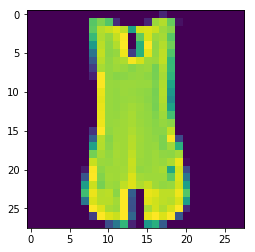

In [18]:
import matplotlib.pyplot as plt
plt.imshow(trainIMG[4])
print(trainLBL[4])

**Image Normaliation**

In [0]:
trainIMG=trainIMG/255
testIMG=testIMG/255

In [25]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
model.fit(trainIMG,trainLBL, epochs=9,callbacks=[callback])

Epoch 1/9
59360/60000 [============================>.] - ETA: 0s - loss: 0.1608 - acc: 0.9397
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1610 - acc: 0.9396


In [37]:
model.evaluate(testIMG,testLBL)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.3626 - acc: 0.8874


[0.3626148025393486, 0.8874]